# 6. Discrete Data Fine Preprocessing

Content include:
 - preprocessing and joining up external data
 - joining with taxi data
 - EDA on aggregated data
 - Plotting
 - One hot encoding of some variables (DULocation one hot encoding too large to store, done on the fly in modelbulding scripts)
 - Standardisation
 - Train Test Split
 - Attempted PCA
 - Feature Selection

In [1]:
import datetime

import pandas as pd
import numpy as np
import statistics as s
import os
import matplotlib.pyplot as plt

## Add other data (but must first undergo own preprocessing)

### Weather

In [2]:
weather_data = pd.read_csv('../data/raw/Weather/new york 2016-01-01 to 2017-12-31.csv')

# Drop unnecessary rows
weather_data = weather_data.drop(['name', 'description','icon',
                                  'stations', 'severerisk'], axis = 1)

In [3]:
# Transform data into correct types and replace none with correct labels
weather_data['preciptype'] = weather_data['preciptype'].replace(np.nan, 'none')
weather_data.datetime = pd.to_datetime(weather_data.datetime).dt.date
weather_data

,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,...,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,sunrise,sunset,moonphase,conditions
0,2016-01-01,5.8,1.7,4.1,3.5,-3.1,0.6,-4.6,53.2,0.00,...,1016.9,71.7,16.0,71.1,6.1,4,2016-01-01T07:20:07,2016-01-01T16:38:54,0.72,Partially cloudy
1,2016-01-02,4.4,0.7,2.2,2.5,-4.1,-1.3,-7.7,48.0,0.00,...,1016.8,43.0,16.0,107.9,9.2,5,2016-01-02T07:20:13,2016-01-02T16:39:45,0.77,Partially cloudy
2,2016-01-03,7.2,1.6,3.9,4.1,-2.5,0.4,-5.9,49.5,0.00,...,1011.2,19.8,16.0,109.9,9.6,5,2016-01-03T07:20:17,2016-01-03T16:40:37,0.81,Clear
3,2016-01-04,2.4,-9.2,-2.3,-1.0,-18.0,-8.1,-12.3,47.0,0.00,...,1017.7,42.8,16.0,113.0,9.8,5,2016-01-04T07:20:19,2016-01-04T16:41:30,0.86,Partially cloudy
4,2016-01-05,-1.8,-11.3,-6.3,-1.8,-20.4,-11.0,-18.5,39.8,0.00,...,1034.5,3.9,16.0,118.8,10.4,5,2016-01-05T07:20:19,2016-01-05T16:42:25,0.90,Clear
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,2017-12-27,-4.2,-7.6,-6.0,-9.4,-14.5,-11.8,-17.1,41.3,0.00,...,1032.0,40.3,16.0,92.1,7.9,4,2017-12-27T07:19:10,2017-12-27T16:35:28,0.31,Partially cloudy
727,2017-12-28,-7.5,-11.0,-9.1,-14.5,-18.4,-16.5,-19.5,43.2,0.00,...,1032.8,10.2,16.0,112.3,9.8,5,2017-12-28T07:19:26,2017-12-28T16:36:10,0.36,Clear
728,2017-12-29,-5.7,-11.5,-8.7,-11.2,-18.7,-14.8,-17.3,50.0,0.00,...,1026.0,39.7,16.0,59.6,5.1,3,2017-12-29T07:19:41,2017-12-29T16:36:55,0.41,Partially cloudy
729,2017-12-30,-5.0,-8.0,-6.4,-6.1,-13.8,-10.8,-12.0,65.3,2.03,...,1018.0,57.4,12.1,29.5,2.5,1,2017-12-30T07:19:53,2017-12-30T16:37:42,0.45,"Snow, Partially cloudy"


In [4]:
# Transform Weather's sunrise and sunset data into numerical values
weather_data.sunrise = pd.to_datetime(weather_data.sunrise)
weather_data.sunset = pd.to_datetime(weather_data.sunset)

weather_data['sunrise'] = weather_data.sunrise.apply(lambda x:(x.hour * 360
                                                               + x.minute * 60 + x.second))
weather_data['sunset'] = weather_data.sunset.apply(lambda x:(x.hour * 360
                                                             + x.minute * 60 + x.second))

weather_data

,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,...,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,sunrise,sunset,moonphase,conditions
0,2016-01-01,5.8,1.7,4.1,3.5,-3.1,0.6,-4.6,53.2,0.00,...,1016.9,71.7,16.0,71.1,6.1,4,3727,8094,0.72,Partially cloudy
1,2016-01-02,4.4,0.7,2.2,2.5,-4.1,-1.3,-7.7,48.0,0.00,...,1016.8,43.0,16.0,107.9,9.2,5,3733,8145,0.77,Partially cloudy
2,2016-01-03,7.2,1.6,3.9,4.1,-2.5,0.4,-5.9,49.5,0.00,...,1011.2,19.8,16.0,109.9,9.6,5,3737,8197,0.81,Clear
3,2016-01-04,2.4,-9.2,-2.3,-1.0,-18.0,-8.1,-12.3,47.0,0.00,...,1017.7,42.8,16.0,113.0,9.8,5,3739,8250,0.86,Partially cloudy
4,2016-01-05,-1.8,-11.3,-6.3,-1.8,-20.4,-11.0,-18.5,39.8,0.00,...,1034.5,3.9,16.0,118.8,10.4,5,3739,8305,0.90,Clear
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,2017-12-27,-4.2,-7.6,-6.0,-9.4,-14.5,-11.8,-17.1,41.3,0.00,...,1032.0,40.3,16.0,92.1,7.9,4,3670,7888,0.31,Partially cloudy
727,2017-12-28,-7.5,-11.0,-9.1,-14.5,-18.4,-16.5,-19.5,43.2,0.00,...,1032.8,10.2,16.0,112.3,9.8,5,3686,7930,0.36,Clear
728,2017-12-29,-5.7,-11.5,-8.7,-11.2,-18.7,-14.8,-17.3,50.0,0.00,...,1026.0,39.7,16.0,59.6,5.1,3,3701,7975,0.41,Partially cloudy
729,2017-12-30,-5.0,-8.0,-6.4,-6.1,-13.8,-10.8,-12.0,65.3,2.03,...,1018.0,57.4,12.1,29.5,2.5,1,3713,8022,0.45,"Snow, Partially cloudy"


In [5]:
# # figure out types (EDA)
# for col in weather_data.columns:
#     print(col)
#     print(type(weather_data[col][0]), '\n')

In [6]:
# figure out types (EDA)
print(set(weather_data['conditions']))
print(set(weather_data['preciptype']))

{'Rain, Partially cloudy', 'Snow, Rain, Partially cloudy', 'Overcast', 'Rain', 'Rain, Overcast', 'Snow, Rain', 'Snow, Rain, Overcast', 'Partially cloudy', 'Snow, Partially cloudy', 'Clear'}
{'none', 'snow', 'rain,snow', 'rain'}


One Hot Encode some of the weather columns

In [7]:
# perform one hot encoding
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(handle_unknown='ignore')
weather_to_ohe = weather_data[['preciptype', 'conditions']]
weather_ohe = ohe.fit_transform(weather_to_ohe).toarray()

weather_ohe = pd.DataFrame(weather_ohe, columns = list(ohe.get_feature_names_out(['preciptype',
                                                                                  'conditions'])))
weather_ohe

,preciptype_none,preciptype_rain,"preciptype_rain,snow",preciptype_snow,conditions_Clear,conditions_Overcast,conditions_Partially cloudy,conditions_Rain,"conditions_Rain, Overcast","conditions_Rain, Partially cloudy","conditions_Snow, Partially cloudy","conditions_Snow, Rain","conditions_Snow, Rain, Overcast","conditions_Snow, Rain, Partially cloudy"
0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
727,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
728,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
729,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [8]:
weather_data = weather_data.drop(['preciptype', 'conditions'], axis = 1)

for col in weather_ohe.columns:
    new_col = weather_ohe[col]
    new_col.index = range(len(new_col))

    weather_data[str(col)] = new_col

weather_data

,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,...,conditions_Clear,conditions_Overcast,conditions_Partially cloudy,conditions_Rain,"conditions_Rain, Overcast","conditions_Rain, Partially cloudy","conditions_Snow, Partially cloudy","conditions_Snow, Rain","conditions_Snow, Rain, Overcast","conditions_Snow, Rain, Partially cloudy"
0,2016-01-01,5.8,1.7,4.1,3.5,-3.1,0.6,-4.6,53.2,0.00,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2016-01-02,4.4,0.7,2.2,2.5,-4.1,-1.3,-7.7,48.0,0.00,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2016-01-03,7.2,1.6,3.9,4.1,-2.5,0.4,-5.9,49.5,0.00,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2016-01-04,2.4,-9.2,-2.3,-1.0,-18.0,-8.1,-12.3,47.0,0.00,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2016-01-05,-1.8,-11.3,-6.3,-1.8,-20.4,-11.0,-18.5,39.8,0.00,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,2017-12-27,-4.2,-7.6,-6.0,-9.4,-14.5,-11.8,-17.1,41.3,0.00,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
727,2017-12-28,-7.5,-11.0,-9.1,-14.5,-18.4,-16.5,-19.5,43.2,0.00,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
728,2017-12-29,-5.7,-11.5,-8.7,-11.2,-18.7,-14.8,-17.3,50.0,0.00,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
729,2017-12-30,-5.0,-8.0,-6.4,-6.1,-13.8,-10.8,-12.0,65.3,2.03,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


### Holiday Data

In [9]:
# Holiday data 1: includes workday before holiday and workday after
holiday_data1 = pd.read_excel('../data/raw/Holidays/NY Holidays 2016-2019.xlsx')

In [10]:
holiday_data1['datetime'] = pd.to_datetime(holiday_data1['datetime']).dt.date

In [11]:
holiday_data1['holiday1'] = 1
holiday_data1

,datetime,holiday1
0,2016-01-01,1
1,2016-01-02,1
2,2016-01-15,1
3,2016-01-18,1
4,2016-01-19,1
...,...,...
127,2019-11-30,1
128,2019-12-24,1
129,2019-12-25,1
130,2019-12-26,1


In [12]:
# Holiday data 2: only includes holiday
holiday_data2 = pd.read_excel('../data/raw/Holidays/NY Holidays2 2016-2019.xlsx')

In [13]:
holiday_data2['datetime'] = pd.to_datetime(holiday_data2['datetime']).dt.date

In [14]:
holiday_data2['holiday2'] = 1
holiday_data2

,datetime,holiday2
0,2016-01-01,1
1,2016-01-18,1
2,2016-02-12,1
3,2016-05-27,1
4,2016-07-01,1
5,2016-09-05,1
6,2016-10-10,1
7,2016-11-11,1
8,2016-11-24,1
9,2016-12-26,1


### Import aggregated taxi data and begin preprocess

In [15]:
data = pd.DataFrame()
for file in sorted(os.listdir('../data/curated/cleaned/discrete')):
    if '2016-01' in file or '2016-02' in file or '2016-03' in file or \
            '2016-04' in file or '2016-05' in file or '2016-06' in file:
        tmp = pd.read_csv(f'../data/curated/cleaned/discrete/{file}')
        data = data.append(tmp)

In [16]:
data

,DOLocationID,hour,Max_PULocationID,Max_PULocationIDs,max_count,datetime
0,1.0,0.0,170.0,[170],2.0,2016-01-01
1,1.0,0.0,230.0,[230],3.0,2016-01-02
2,1.0,0.0,261.0,[261],2.0,2016-01-03
3,1.0,0.0,132.0,"[132, 161, 164, 170, 186, 230, 238]",1.0,2016-01-04
4,1.0,0.0,161.0,"[132, 161, 164, 170, 186, 230, 238]",1.0,2016-01-04
...,...,...,...,...,...,...
94631,263.0,7.0,186.0,[186],83.0,2016-06-26
94632,263.0,7.0,263.0,[263],89.0,2016-06-27
94633,263.0,7.0,162.0,[162],87.0,2016-06-28
94634,263.0,7.0,161.0,[161],101.0,2016-06-29


# EDA on aggregated data and Plots

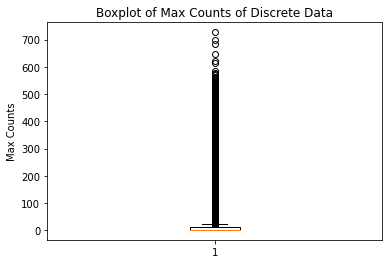

In [17]:
plt.boxplot(data['max_count']);
plt.ylabel('Max Counts')
plt.title('Boxplot of Max Counts of Discrete Data')
plt.show()

In [18]:
# Get 5 point summary and hence discard data below 75% quantile
data['max_count'].describe()

count    565425.000000
mean         15.788541
std          38.000149
min           1.000000
25%           1.000000
50%           2.000000
75%          10.000000
max         727.000000
Name: max_count, dtype: float64

In [19]:
# discard data under 75% quantile
data_75 = data[data['max_count']>=5]

In [20]:
data_75['max_count'].describe()

count    202253.000000
mean         41.216051
std          55.034289
min           5.000000
25%           9.000000
50%          19.000000
75%          53.000000
max         727.000000
Name: max_count, dtype: float64

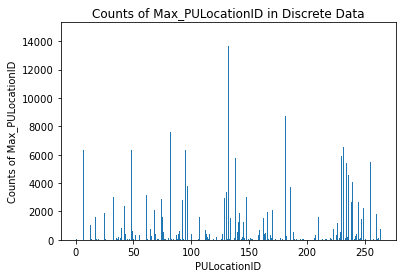

In [21]:
value_count = data_75['Max_PULocationID'].value_counts()

plt.xlabel('PULocationID')
plt.ylabel('Counts of Max_PULocationID')
plt.title('Counts of Max_PULocationID in Discrete Data')
plt.bar(value_count.index, height = value_count)

plt.show()

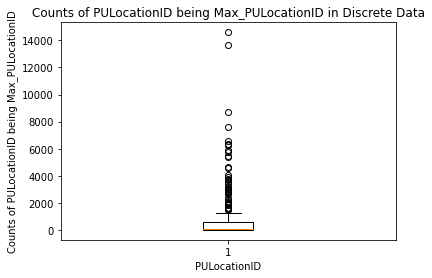

In [22]:
plt.xlabel('PULocationID')
plt.ylabel('Counts of PULocationID being Max_PULocationID')
plt.title('Counts of PULocationID being Max_PULocationID in Discrete Data')
plt.boxplot(value_count)

plt.show()

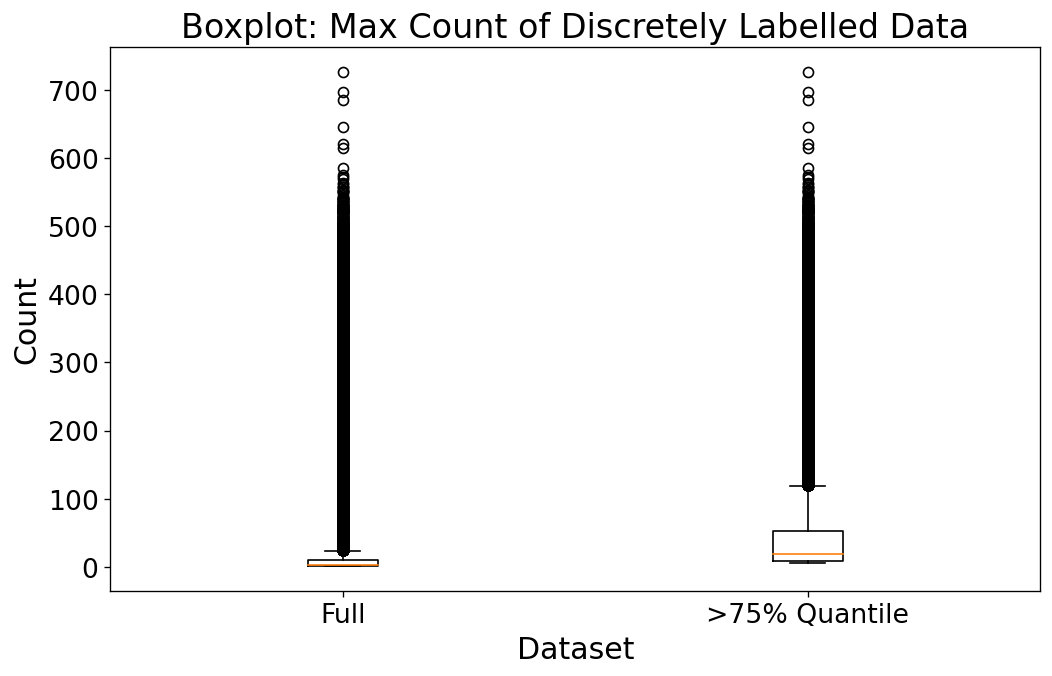

In [23]:
# Create the plot to use in report
from matplotlib.pyplot import figure
figure(figsize=(10, 6), dpi=120)

dataA = data['max_count']

dataB = data_75['max_count']

plt.boxplot([dataA, dataB])
plt.yticks(fontsize=16)
plt.xticks([1, 2], ['Full', '>75% Quantile'],fontsize=16)
plt.title("Boxplot: Max Count of Discretely Labelled Data", fontsize=20)
plt.xlabel('Dataset', fontsize=18)
plt.ylabel('Count', fontsize=18);

plt.savefig('../plots/boxplot_discrete1.png')

In [27]:
data_75['weekday'] = pd.to_datetime(data_75['datetime']).dt.weekday
data_75

/var/folders/xg/8w_3dndd6l5c3n99vd7vd3f40000gn/T/ipykernel_7355/3572086656.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_75['weekday'] = pd.to_datetime(data_75['datetime']).dt.weekday


,DOLocationID,hour,Max_PULocationID,Max_PULocationIDs,max_count,datetime,weekday
62,1.0,1.0,186.0,[186],7.0,2016-01-01,4
63,1.0,1.0,161.0,"[161, 162, 230]",9.0,2016-01-02,5
64,1.0,1.0,162.0,"[161, 162, 230]",9.0,2016-01-02,5
65,1.0,1.0,230.0,"[161, 162, 230]",9.0,2016-01-02,5
66,1.0,1.0,230.0,[230],12.0,2016-01-03,6
...,...,...,...,...,...,...,...
94631,263.0,7.0,186.0,[186],83.0,2016-06-26,6
94632,263.0,7.0,263.0,[263],89.0,2016-06-27,0
94633,263.0,7.0,162.0,[162],87.0,2016-06-28,1
94634,263.0,7.0,161.0,[161],101.0,2016-06-29,2


In [24]:
print(np.mean(value_count))

864.3290598290598


In [28]:
# create weekday labels (one hot encoded)
data_75['weekdaylabel1_weekday'] = data_75['weekday'].apply(lambda x:(1 if
                                                                x in [0, 1, 2, 3, 4] else 0))
data_75['weekdaylabel1_weekend'] = data_75['weekday'].apply(lambda x:(1 if
                                                                x in [5, 6] else 0))

data_75['weekdaylabel2_weekday'] = data_75['weekday'].apply(lambda x:(1 if
                                                                x in [0, 1, 2, 3] else 0))
data_75['weekdaylabel2_friday'] = data_75['weekday'].apply(lambda x:(1 if
                                                                x in [4] else 0))
data_75['weekdaylabel2_weekend'] = data_75['weekday'].apply(lambda x:(1 if
                                                                x in [5, 6] else 0))

data_75 = data_75.drop(['weekday'], axis = 1)

data_75

/var/folders/xg/8w_3dndd6l5c3n99vd7vd3f40000gn/T/ipykernel_7355/3868608344.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_75['weekdaylabel1_weekday'] = data_75['weekday'].apply(lambda x:(1 if
/var/folders/xg/8w_3dndd6l5c3n99vd7vd3f40000gn/T/ipykernel_7355/3868608344.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_75['weekdaylabel1_weekend'] = data_75['weekday'].apply(lambda x:(1 if
/var/folders/xg/8w_3dndd6l5c3n99vd7vd3f40000gn/T/ipykernel_7355/3868608344.py:7: SettingWithCopyWarning: 
A 

,DOLocationID,hour,Max_PULocationID,Max_PULocationIDs,max_count,datetime,weekdaylabel1_weekday,weekdaylabel1_weekend,weekdaylabel2_weekday,weekdaylabel2_friday,weekdaylabel2_weekend
62,1.0,1.0,186.0,[186],7.0,2016-01-01,1,0,0,1,0
63,1.0,1.0,161.0,"[161, 162, 230]",9.0,2016-01-02,0,1,0,0,1
64,1.0,1.0,162.0,"[161, 162, 230]",9.0,2016-01-02,0,1,0,0,1
65,1.0,1.0,230.0,"[161, 162, 230]",9.0,2016-01-02,0,1,0,0,1
66,1.0,1.0,230.0,[230],12.0,2016-01-03,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
94631,263.0,7.0,186.0,[186],83.0,2016-06-26,0,1,0,0,1
94632,263.0,7.0,263.0,[263],89.0,2016-06-27,1,0,1,0,0
94633,263.0,7.0,162.0,[162],87.0,2016-06-28,1,0,1,0,0
94634,263.0,7.0,161.0,[161],101.0,2016-06-29,1,0,1,0,0


# Join up preprocessed external datasets with preprocessed taxi dataset

In [29]:
data_75['datetime'] = pd.to_datetime(data_75['datetime']).dt.date

# merge weather data
joined_data_75 = data_75.merge(weather_data, on = 'datetime', how = 'inner')

In [30]:
# merge holiday data
joined_data_75 = joined_data_75.merge(holiday_data1, on = 'datetime', how='left')
# merge holiday data 2
joined_data_75 = joined_data_75.merge(holiday_data2, on = 'datetime', how='left')

In [31]:
joined_data_75 = joined_data_75.replace(np.nan, 0)

In [32]:
joined_data_75

,DOLocationID,hour,Max_PULocationID,Max_PULocationIDs,max_count,datetime,weekdaylabel1_weekday,weekdaylabel1_weekend,weekdaylabel2_weekday,weekdaylabel2_friday,...,conditions_Partially cloudy,conditions_Rain,"conditions_Rain, Overcast","conditions_Rain, Partially cloudy","conditions_Snow, Partially cloudy","conditions_Snow, Rain","conditions_Snow, Rain, Overcast","conditions_Snow, Rain, Partially cloudy",holiday1,holiday2
0,1.0,1.0,186.0,[186],7.0,2016-01-01,1,0,0,1,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
1,1.0,2.0,161.0,"[161, 230]",9.0,2016-01-01,1,0,0,1,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
2,1.0,2.0,230.0,"[161, 230]",9.0,2016-01-01,1,0,0,1,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
3,1.0,3.0,186.0,"[186, 230]",12.0,2016-01-01,1,0,0,1,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
4,1.0,3.0,230.0,"[186, 230]",12.0,2016-01-01,1,0,0,1,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202248,263.0,3.0,236.0,[236],114.0,2016-06-04,0,1,0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
202249,263.0,4.0,236.0,[236],134.0,2016-06-04,0,1,0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
202250,263.0,5.0,236.0,[236],124.0,2016-06-04,0,1,0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
202251,263.0,6.0,236.0,[236],194.0,2016-06-04,0,1,0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


# One Hot Encode 3 Hour Block (from Original Data)

In [33]:
ohe = OneHotEncoder(handle_unknown='ignore')

joined_to_ohe = joined_data_75[['hour']]
joined_ohe = ohe.fit_transform(joined_to_ohe).toarray()

joined_ohe = pd.DataFrame(joined_ohe, columns=list(ohe.get_feature_names_out(['hour'])))

joined_data_75 = joined_data_75.drop(['hour'], axis=1)

for col in joined_ohe.columns:
    new_col = joined_ohe[col]
    new_col.index = range(len(new_col))

    joined_data_75[str(col)] = new_col

joined_data_75

,DOLocationID,Max_PULocationID,Max_PULocationIDs,max_count,datetime,weekdaylabel1_weekday,weekdaylabel1_weekend,weekdaylabel2_weekday,weekdaylabel2_friday,weekdaylabel2_weekend,...,holiday1,holiday2,hour_0.0,hour_1.0,hour_2.0,hour_3.0,hour_4.0,hour_5.0,hour_6.0,hour_7.0
0,1.0,186.0,[186],7.0,2016-01-01,1,0,0,1,0,...,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,161.0,"[161, 230]",9.0,2016-01-01,1,0,0,1,0,...,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,1.0,230.0,"[161, 230]",9.0,2016-01-01,1,0,0,1,0,...,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,1.0,186.0,"[186, 230]",12.0,2016-01-01,1,0,0,1,0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,1.0,230.0,"[186, 230]",12.0,2016-01-01,1,0,0,1,0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202248,263.0,236.0,[236],114.0,2016-06-04,0,1,0,0,1,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
202249,263.0,236.0,[236],134.0,2016-06-04,0,1,0,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
202250,263.0,236.0,[236],124.0,2016-06-04,0,1,0,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
202251,263.0,236.0,[236],194.0,2016-06-04,0,1,0,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


# Train Test Split

In [34]:
# Train: between Jan01 and May10
Train = joined_data_75[joined_data_75['datetime'] <=
                       datetime.date(year=2016, month=5, day=10)]

# Val: between May11 and Jun5
Validate = joined_data_75[(joined_data_75['datetime'] >=
                           datetime.date(year=2016, month=5, day=11)) &
                          (joined_data_75['datetime'] <=
                           datetime.date(year=2016, month=6, day=5))]

# Test: between Jun6 and Jun30
Test =joined_data_75[(joined_data_75['datetime'] >=
                      datetime.date(year=2016, month=6, day=6)) &
                     ((joined_data_75['datetime'] <=
                       datetime.date(year=2016, month=6, day=30)))]

In [35]:
Train.sort_values(['datetime'])

,DOLocationID,Max_PULocationID,Max_PULocationIDs,max_count,datetime,weekdaylabel1_weekday,weekdaylabel1_weekend,weekdaylabel2_weekday,weekdaylabel2_friday,weekdaylabel2_weekend,...,holiday1,holiday2,hour_0.0,hour_1.0,hour_2.0,hour_3.0,hour_4.0,hour_5.0,hour_6.0,hour_7.0
0,1.0,186.0,[186],7.0,2016-01-01,1,0,0,1,0,...,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
815,181.0,181.0,[181],82.0,2016-01-01,1,0,0,1,0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
814,181.0,181.0,[181],49.0,2016-01-01,1,0,0,1,0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
813,181.0,181.0,[181],25.0,2016-01-01,1,0,0,1,0,...,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
812,181.0,181.0,[181],25.0,2016-01-01,1,0,0,1,0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143776,197.0,132.0,[132],8.0,2016-05-10,1,0,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
143775,197.0,95.0,[95],6.0,2016-05-10,1,0,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
143774,197.0,132.0,[132],6.0,2016-05-10,1,0,1,0,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
143788,202.0,7.0,[7],5.0,2016-05-10,1,0,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


# Standardisation

In [36]:
for col in Train.columns:
    if col not in ['DOLocationID', 'hour', 'Max_PULocationID',
                   'Max_PULocationIDs', 'max_count', 'datetime',
                   'preciptype_none', 'preciptype_rain', 'preciptype_rain,snow',
                   'preciptype_snow', 'conditions_Clear', 'conditions_Overcast',
                   'conditions_Partially cloudy', 'conditions_Rain',
                   'conditions_Rain, Overcast', 'conditions_Rain, Partially cloudy',
                   'conditions_Snow, Partially cloudy', 'conditions_Snow, Rain',
                   'conditions_Snow, Rain, Overcast', 'conditions_Snow, Rain, Partially cloudy',
                   'conditions_Snow, Rain, Partially cloudy', 'holiday1', 'holiday2',
                   'weekdaylabel1_weekday', 'weekdaylabel1_weekend', 'weekdaylabel2_weekday',
                   'weekdaylabel2_friday', 'weekdaylabel2_weekend', 'hour_0.0',
                   'hour_1.0', 'hour_2.0', 'hour_3.0', 'hour_4.0', 'hour_5.0',
                   'hour_6.0', 'hour_7.0']:
        print(col)

        # use train data mean and std to prevent overfit
        mean = s.mean(Train[col])
        std = s.stdev(Train[col])

        # (x - mean(train))/std(train)
        Train[col] = (Train[col] - mean)/std
        Validate[col] = (Validate[col] - mean)/std
        Test[col] = (Test[col] - mean)/std

tempmax


/var/folders/xg/8w_3dndd6l5c3n99vd7vd3f40000gn/T/ipykernel_7355/4239809557.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Train[col] = (Train[col] - mean)/std
/var/folders/xg/8w_3dndd6l5c3n99vd7vd3f40000gn/T/ipykernel_7355/4239809557.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Validate[col] = (Validate[col] - mean)/std
/var/folders/xg/8w_3dndd6l5c3n99vd7vd3f40000gn/T/ipykernel_7355/4239809557.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Tr

tempmin
temp
feelslikemax
feelslikemin
feelslike
dew
humidity
precip
precipprob
precipcover
snow
snowdepth
windgust
windspeed
winddir
sealevelpressure
cloudcover
visibility
solarradiation
solarenergy
uvindex
sunrise
sunset
moonphase


In [37]:
# create directory if not exist
output_relative_dirs = ['../data/curated/ModelBuilding/Discrete',
                        '../data/curated/ModelBuilding/DiscreteKBest']

# check if it exists as it makedir will raise an error if it does exist
for output_relative_dir in output_relative_dirs:
    if not os.path.exists(output_relative_dir):
        os.makedirs(output_relative_dir)

In [38]:
# Export cleaned data with all columns in case need to re-select features - trade space for time
Train.to_csv('../data/curated/ModelBuilding/Discrete/FullTrain_16-1_16-5.csv', index = False)
Validate.to_csv('../data/curated/ModelBuilding/Discrete/FullVal_16-5_16-6.csv', index = False)
Test.to_csv('../data/curated/ModelBuilding/Discrete/FullTest_16-6_16-6.csv', index = False)

# PCA (ATTEMPTED, NOT SUCCESSFUL)

In [39]:
X = Train.drop(['datetime', 'Max_PULocationIDs', 'Max_PULocationID', 'max_count', 'DOLocationID'], axis = 1)
y = Train['Max_PULocationID'].astype(str)

In [40]:
X.head()

,weekdaylabel1_weekday,weekdaylabel1_weekend,weekdaylabel2_weekday,weekdaylabel2_friday,weekdaylabel2_weekend,tempmax,tempmin,temp,feelslikemax,feelslikemin,...,holiday1,holiday2,hour_0.0,hour_1.0,hour_2.0,hour_3.0,hour_4.0,hour_5.0,hour_6.0,hour_7.0
0,1,0,0,1,0,-0.698427,-0.231067,-0.426187,-0.761072,-0.339188,...,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,0,0,1,0,-0.698427,-0.231067,-0.426187,-0.761072,-0.339188,...,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,1,0,0,1,0,-0.698427,-0.231067,-0.426187,-0.761072,-0.339188,...,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,1,0,0,1,0,-0.698427,-0.231067,-0.426187,-0.761072,-0.339188,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,1,0,0,1,0,-0.698427,-0.231067,-0.426187,-0.761072,-0.339188,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [41]:
# from sklearn.decomposition import PCA
# pca = PCA(n_components=5)
# pca.fit(X)
# pca_result = pca.transform(X)

In [42]:
# list(pca.explained_variance_)

In [43]:
# pd.DataFrame(pca_result)

# Feature Selection

In [44]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

In [45]:
# F-test
f = SelectKBest(f_classif, k=len(X.columns))
f.fit(X,y)

/Applications/anaconda3/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [37] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Applications/anaconda3/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


SelectKBest(k=54)

In [46]:
# get the ranked feature names and scores
kbest_scores1 = pd.DataFrame({'features': f.get_feature_names_out(), 'scores': f.scores_})
kbest_scores1 = kbest_scores1.sort_values('scores', ascending=False)
kbest_scores1

,features,scores
47,hour_1.0,97.713889
48,hour_2.0,53.449014
46,hour_0.0,48.742270
0,weekdaylabel1_weekday,26.341111
1,weekdaylabel1_weekend,26.341111
4,weekdaylabel2_weekend,26.341111
52,hour_6.0,23.385082
2,weekdaylabel2_weekday,22.914564
53,hour_7.0,22.888451
51,hour_5.0,22.452536


### Select correct columns

In [137]:
# import pandas as pd
# Train = pd.read_csv('../data/curated/ModelBuilding/Discrete/FullTrain_16-1_16-5.csv')
# Validate = pd.read_csv('../data/curated/ModelBuilding/Discrete/FullVal_16-5_16-6.csv')
# Test = pd.read_csv('../data/curated/ModelBuilding/Discrete/FullTest_16-6_16-6.csv')

In [47]:
X_train = Train[['weekdaylabel1_weekday',
                 'weekdaylabel1_weekend', 'hour_0.0',
                 'hour_1.0', 'hour_2.0', 'hour_3.0', 'hour_4.0',
                 'hour_5.0', 'hour_6.0', 'hour_7.0', 'holiday2',
                 'dew','DOLocationID', 'temp', 'tempmax', 'tempmin',
                 'snow', 'snowdepth',
                 'datetime']]
y_train = Train[['Max_PULocationID', 'Max_PULocationIDs']].astype(str)

In [48]:
X_validate = Validate[['weekdaylabel1_weekday',
                 'weekdaylabel1_weekend', 'hour_0.0',
                 'hour_1.0', 'hour_2.0', 'hour_3.0', 'hour_4.0',
                 'hour_5.0', 'hour_6.0', 'hour_7.0', 'holiday2',
                 'dew','DOLocationID', 'temp', 'tempmax', 'tempmin',
                 'snow', 'snowdepth',
                 'datetime']]
y_validate = Validate[['Max_PULocationID', 'Max_PULocationIDs']].astype(str)

In [49]:
X_test = Test[['weekdaylabel1_weekday',
                 'weekdaylabel1_weekend', 'hour_0.0',
                 'hour_1.0', 'hour_2.0', 'hour_3.0', 'hour_4.0',
                 'hour_5.0', 'hour_6.0', 'hour_7.0', 'holiday2',
                 'dew','DOLocationID', 'temp', 'tempmax', 'tempmin',
                 'snow', 'snowdepth',
                 'datetime']]
y_test = Test[['Max_PULocationID', 'Max_PULocationIDs']].astype(str)

# Export

In [50]:
X_train.to_csv('../data/curated/ModelBuilding/Discrete/XTrain_16-1_16-5.csv', index = False)
X_validate.to_csv('../data/curated/ModelBuilding/Discrete/XVal_16-5_16-6.csv', index = False)
X_test.to_csv('../data/curated/ModelBuilding/Discrete/XTest_16-6_16-6.csv', index = False)
y_train.to_csv('../data/curated/ModelBuilding/Discrete/yTrain_16-1_16-5.csv', index = False)
y_validate.to_csv('../data/curated/ModelBuilding/Discrete/yVal_16-5_16-6.csv', index = False)
y_test.to_csv('../data/curated/ModelBuilding/Discrete/yTest_16-6_16-6.csv', index = False)

In [51]:
kbest_scores1.to_csv('../data/curated/ModelBuilding/DiscreteKBest/f_16-1_16-6.csv', index=False)